# Exploratory Data Analysis with Python

---
---

The Process:
1. [Import dependencies and configure settings](#Step-1:-Import-dependencies-and-configure-settings)
2. [Load the data into python](#Step-2:-Load-the-data-into-python)
3. [Look at the raw data](#Step-3:-Look-at-the-raw-data)
4. [Ask questions and make plots to dive deeper](#Step-4:-Ask-questions-and-make-plots-to-dive-deeper)
5. [Outline a plan of action for arriving at the final product](#Step-5:-Outline-a-plan-of-action-for-arriving-at-the-final-product)

---

## Step 1: Import dependencies and configure settings

### Import packages, modules, objects, or functions into the current notebook
TIP: Avoid 'from PACKAGE import *' syntax as it clutters your namespace with objects you may not be aware of

In [1]:
# BEST PRACTICE: import built-in packages first
# from PACKAGE import OBJECT lets us bring only what we need into our namespace
from warnings import filterwarnings
# import PACKAGE, brings the all modules into one object named PACKAGE
import re

# BEST PRACTICE: import third-party packages second
# from PACKAGE import OBJECT as ALIAS, renames the object in our namespace
from geopy.geocoders import Nominatim as geopy_Nominatim
from nltk.tokenize import word_tokenize as nltk_word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer as nltk_WordNetLemmatizer
from nltk.tag import pos_tag as nltk_pos_tag
from pandas_profiling import ProfileReport
from wordcloud import (
    # use parenthesis to import multiple objects and even add aliases
    STOPWORDS as wordcloud_STOPWORDS,
    WordCloud
)
import matplotlib.pyplot as plt
import nltk
# aliases can be added when fully importing packages
import pandas as pd
# aliases can also be used when importing an individual module from the package
import plotly.express as px
import plotly.io as pio
import seaborn as sns

# BEST PRACTICE: import custom packages last
# for example: import custom_module as cm

### Configure settings by using functions or methods (always check the documentation)
Third-party packages used in this notebook:
- [GeoPy](https://geopy.readthedocs.io/en/stable/)
- [Matplotlib](https://matplotlib.org/)
- [Natural Language Toolkit](https://www.nltk.org/)
- [Pandas](https://pandas.pydata.org/pandas-docs/version/1.2.4/user_guide/index.html)
- [Pandas Profiling](https://pandas-profiling.ydata.ai/docs/master/index.html)
- [Plotly](https://plotly.com/python/)
- [Seaborn](https://seaborn.pydata.org/)
- [WordCloud](https://amueller.github.io/word_cloud/)

In [2]:
# set python shell filter out warnings and avoid cluttering outputs
filterwarnings(
    'ignore'
)

In [3]:
# set custom pandas package options by iterating through key-value pairs in a dictionary
for option, value in { # dictionaries are denoted by curly brackets {} or the dict() function
    'display.max_columns': 50,
    'display.max_colwidth': None,
    'display.max_info_columns': 50,
    'display.max_rows': 20,
    'display.precision': 4
}.items(): # the .items() function of a dictionary lets us iterate through key, value pairs
    # we can call a function on the variable we set for the objects we're iterating over
    # in this case those variables are 'option', and 'value' and they represent
    # the key, value pairs from the dictionary above
    pd.set_option(
        option, # this will be 'display.max_columns' etc..
        value   # this will be 50, None, etc..
    )

[Top](#Exploratory-Data-Analysis-with-Python)

---

## Step 2: Load the data into python

### Use tools that 'open' files and load their contents into objects
NOTE: It is possible to build custom functions to read files, but not advised as there are many python libraries that can do so while providing enhanced performance and additional functionality

In [4]:
# load each dataset into a pandas DataFrame object
cocoon_pharmacy_df = pd.read_csv(
    # the read_csv function from the pandas package will read the file at this location
    '../data/cocoon_center_pharmacy.csv'
)
data_literacy_df = pd.read_csv(
    # the '..' notation indicates that parsing should begin at the parent folder 
    # of this notebook, so if this notebook is in the 'notebooks/' folder then
    # '..' would map to the root folder of this repository (the parent of 'notebooks/') 
    '../data/data_literacy_questionnaire.csv'
)
data_journey_df = pd.read_csv(
    '../data/data_journey_questionnaire.csv'
)
meeting_cadence_df = pd.read_csv(
    '../data/meeting_cadence_survey.csv'
)

[Top](#Exploratory-Data-Analysis-with-Python)

---

## Step 3: Look at the raw data

### Option 1: Define a custom function to determine what is shown on-screen
This is only advised when looking for something specific in the raw dataset like missing data or if the third-party tools are insufficient

In [5]:
# create an example function with one mandatory and one optional parameter
def display_with_info(
    dataframe: pd.DataFrame,
    name: str = None
) -> None:
    # print dataframe name if passed
    if name:
        print(
            '=' * len(name),
            end = '\n'
        )
        print(
            name,
            end = '\n' + (
                '=' * len(name)
            ) + '\n\n'
        )
    # display dataframe information
    display(
        dataframe.info()
    )
    # label the next output
    print(
        # create the illusion of a border by using hyphens
        '-' * 14
    )
    print(
        'First Ten Rows',
        # create the illusion of a border by using hyphens
        end = '\n' + (
            '-' * 14
        )
    )
    # display the first ten rows of the dataframe
    display(
        dataframe.head(
            5
        )
    )
    # label the next output
    print(
        # create the illusion of a border by using hyphens
        '\n',
        end = (
            '-' * 13
        ) + '\n'
    )
    print(
        'Last Ten Rows',
        # create the illusion of a border by using hyphens
        end = '\n' + (
            '-' * 13
        )
    )
    # display the last ten rows of the dataframe
    display(
        dataframe.tail(
            5
        )
    )

TIP: Placing the names of objects with data into a 'reference' object can assist when operating on mutiple datasets

In [6]:
# create a dictionary object referencing dataframes and their names
sample_datasets = {
    'Cocoon Center Pharmacy Items & Reviews': cocoon_pharmacy_df,
    'Data Literacy Questionnaire': data_literacy_df,
    'Data Journey Questionnaire': data_journey_df,
    'Meeting Cadence Survey': meeting_cadence_df
}

In [7]:
# iterate through (dataframe name: dataframe object) 'key: value' pairs 
for df_name, df_object in sample_datasets.items():
    # display each dataframe's summary information and five (5) rows from both ends
    display_with_info(
        df_object,
        df_name
    )
    # add a horizontal border to separate outputs
    print(
        '\n' + (
            '_' * 79
        ),
        end = '\n\n'
    )

Cocoon Center Pharmacy Items & Reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EAN_code           1539 non-null   int64  
 1   product_cat        1539 non-null   object 
 2   brand              1539 non-null   object 
 3   form               1539 non-null   object 
 4   volume             1539 non-null   object 
 5   price              1539 non-null   float64
 6   description        1539 non-null   object 
 7   num_review         1539 non-null   int64  
 8   overall_rate       1539 non-null   float64
 9   overall_prod_qual  1539 non-null   object 
 10  customer_id        1539 non-null   object 
 11  age_group          1539 non-null   object 
 12  gender             1539 non-null   object 
 13  customer_loc       1539 non-null   object 
 14  cus_rev_num        1539 non-null   int64  
 15  review_vote        1539 non-null

None

--------------
First Ten Rows
--------------

EAN_code        product_cat     brand   form volume  price  \
0  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
1  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
2  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
3  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
4  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   

                                         description  num_review  \
0  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
1  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
2  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
3  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
4  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   

   overall_rate overall_prod_qual   customer_id age_group  gender  \
0           4.8               4.9   ALDHAFEERI      35-44    male   
1           4.8               4.9         Rana      25-34  female   
2           4.8               4.9         Evoo      25-34  female   
3           4.8               4.9         Uvva      35-44  female   
4           4.8               4.9     Marie PC      45-54  female   

       customer_loc  cus_rev_num  review_vote  customer_rate product_qual  \
0    SAUDI ARABIA              4            0              5            5   
1     not available            2            0              5            5   
2    Saudi Arabia              4            0              5            5   
3    Riga, Latvia              2            0              5            5   
4              UK              4            0              5            5   

  recommend                head_review  \
0       yes                      great   
1       yes                       love   
2       yes           perfect moisture   
3       yes            best experience   
4       yes  best moisturiser dry skin   

                                                                                                                                          body_review  \
0                                                                                                                        great item fast shipping buy   
1                                                                                                     bought month like productand second time bought   
2                                                                                                            bought sister perfect moisture ever used   
3                                                                             family happy wonderful product winter season skin vwry dry product help   
4  used product many year never failed family highly nourishing amazing dry sensitive skin thank continue use foreseeable would 100 recommend product   

   review_date  
0  4 hours ago  
1   2 days ago  
2  11 days ago  
3  23 days ago  
4  a month ago


-------------
Last Ten Rows
-------------

EAN_code        product_cat                  brand   form  \
1534  3264680015946      Body Dry Oils                   Nuxe    Oil   
1535  3264680015946      Body Dry Oils                   Nuxe    Oil   
1536  3540550008141        Body Scrubs                Filorga  Cream   
1537  3540550008141        Body Scrubs                Filorga  Cream   
1538  3577056020742  Body Moisturisers  PierreFabreHealthCare  Cream   

             volume  price  \
1534            100   19.8   
1535            100   19.8   
1536            150   15.4   
1537            150   15.4   
1538  not available   10.9   

                                                        description  \
1534                           Nuxe Huile Prodigieuse Florale 100ml   
1535                           Nuxe Huile Prodigieuse Florale 100ml   
1536                              Filorga Scrub and Peel Body 150ml   
1537                              Filorga Scrub and Peel Body 150ml   
1538  Pierre Fabre Health Care Dexeryl Cutaneous Dryness Cream 500g   

      num_review  overall_rate overall_prod_qual  customer_id      age_group  \
1534           2           5.0               5.0    Chris269           45-54   
1535           2           5.0               5.0     RandaMB   not available   
1536           2           4.5               5.0        meme           35-44   
1537           2           4.5               5.0        Rfam           55-64   
1538           1           4.0               5.0   Monica M.           18-24   

             gender      customer_loc  cus_rev_num  review_vote  \
1534         female       Stockport              2            0   
1535  not available    Saudi Arabia              3            5   
1536         female          Kuwait              2            1   
1537         female     not available            3            1   
1538         female     not available            3            1   

      customer_rate product_qual      recommend       head_review  \
1534              5            5            yes  lovely fragrance   
1535              5            5  not available     not available   
1536              5            5            yes             great   
1537              4            5  not available             great   
1538              4            5            yes           amazing   

                                                                                    body_review  \
1534  nuxe oil gorgeous almost addicted florale fragrance come nuxe please produce parfum match   
1535                               like polished bioderma body cream smell beautiful paint skin   
1536                                                                     bought month ago happy   
1537                                                   work good exfoliating skin act lubricant   
1538                                                       used year good atopic skin icthyosys   

       review_date  
1534  5 months ago  
1535  8 months ago  
1536  5 months ago  
1537  8 months ago  
1538  7 months ago


_______________________________________________________________________________

Data Literacy Questionnaire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 17 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   ID                                                                                                                        37 non-null     int64  
 1   Start time                                                                                                                37 non-null     object 
 2   Completion time                                                                                                           37 non-null     object 
 3   Total points              

None

--------------
First Ten Rows
--------------

ID        Start time   Completion time  Total points  Quiz feedback  \
0   1  4-14-22 12:03:45  4-14-22 12:05:15           NaN            NaN   
1   2  4-14-22 12:08:47  4-14-22 12:10:22           NaN            NaN   
2   3   4-20-22 7:34:19   4-20-22 7:35:45           NaN            NaN   
3   4   4-20-22 7:50:08   4-20-22 7:55:17           NaN            NaN   
4   5  4-20-22 16:30:10  4-20-22 16:31:51           NaN            NaN   

                                                                                                                            Are you data literate?  \
0  I am a data & analytics expert. Highly influential in driving new business value, I also coach others to use data & analytics more effectively.   
1  I am a data & analytics expert. Highly influential in driving new business value, I also coach others to use data & analytics more effectively.   
2                    I am a data & analytics practitioner. I apply data & analytics concepts that are critical to the success of my everyday work.   
3  I am a data & analytics expert. Highly influential in driving new business value, I also coach others to use data & analytics more effectively.   
4  I am a data & analytics expert. Highly influential in driving new business value, I also coach others to use data & analytics more effectively.   

   Points - Are you data literate?  Feedback - Are you data literate?  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                              NaN                                NaN   

                                     How would you evaluate your ability to formulate questions to find meaningful answers in data?  \
0  I can run entire projects based on multidimensional questions that need complex data queries and multiple iterations to resolve.   
1  I can run entire projects based on multidimensional questions that need complex data queries and multiple iterations to resolve.   
2                                                                      I ask questions that can be answered by simple data queries.   
3  I can run entire projects based on multidimensional questions that need complex data queries and multiple iterations to resolve.   
4                                                                      I ask questions that can be answered by simple data queries.   

   Points - How would you evaluate your ability to formulate questions to find meaningful answers in data?  \
0                                                                                                      NaN   
1                                                                                                      NaN   
2                                                                                                      NaN   
3                                                                                                      NaN   
4                                                                                                      NaN   

   Feedback - How would you evaluate your ability to formulate questions to find meaningful answers in data?  \
0                                                                                                        NaN   
1                                                                                                        NaN   
2                                                                                                        NaN   
3                                                                                                        NaN   
4                                                                                                        NaN   

                                                                         


-------------
Last Ten Rows
-------------

ID       Start time  Completion time  Total points  Quiz feedback  \
32  33  5-17-22 6:39:23  5-17-22 6:40:34           NaN            NaN   
33  34  5-20-22 6:47:34  5-20-22 6:51:43           NaN            NaN   
34  35  5-30-22 2:08:22  5-30-22 2:30:16           NaN            NaN   
35  36  6-9-22 16:05:47  6-9-22 16:07:31           NaN            NaN   
36  37  7-12-22 8:30:06  7-12-22 8:32:23           NaN            NaN   

                                                                                                                             Are you data literate?  \
32                    I am a data & analytics practitioner. I apply data & analytics concepts that are critical to the success of my everyday work.   
33  I am a data & analytics expert. Highly influential in driving new business value, I also coach others to use data & analytics more effectively.   
34             I am a data literacy learner. I am actively learning how to use data & analytics better to impact specific areas of my job function.   
35              I am data literacy aware. I am starting to develop a general awareness of why data and analytics matters to me and my organization.   
36                    I am a data & analytics practitioner. I apply data & analytics concepts that are critical to the success of my everyday work.   

    Points - Are you data literate?  Feedback - Are you data literate?  \
32                              NaN                                NaN   
33                              NaN                                NaN   
34                              NaN                                NaN   
35                              NaN                                NaN   
36                              NaN                                NaN   

                                      How would you evaluate your ability to formulate questions to find meaningful answers in data?  \
32                                                                      I ask questions that can be answered by simple data queries.   
33  I can run entire projects based on multidimensional questions that need complex data queries and multiple iterations to resolve.   
34                                                                   I have no intuition for what questions can be answered by data.   
35                                                                   I have no intuition for what questions can be answered by data.   
36  I can run entire projects based on multidimensional questions that need complex data queries and multiple iterations to resolve.   

    Points - How would you evaluate your ability to formulate questions to find meaningful answers in data?  \
32                                                                                                      NaN   
33                                                                                                      NaN   
34                                                                                                      NaN   
35                                                                                                      NaN   
36                                                                                                      NaN   

    Feedback - How would you evaluate your ability to formulate questions to find meaningful answers in data?  \
32                                                                                                        NaN   
33                                                                                                        NaN   
34                                                                                                        NaN   
35                                                                                                        NaN   
36                                                                                                        NaN   

                                                  


_______________________________________________________________________________

Data Journey Questionnaire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   ID                                                               25 non-null     int64 
 1   Start time                                                       25 non-null     object
 2   Completion time                                                  25 non-null     object
 3   Language                                                         2 non-null      object
 4   What of level of data expertise are you interested in reaching?  25 non-null     object
 5   Which educational resources could you see yourself using?        25 non-null     object
 6   What subjects are you interested in lea

None

--------------
First Ten Rows
--------------

ID        Start time   Completion time Language  \
0   1  5-16-22 13:41:32  5-16-22 13:42:19      NaN   
1   2  5-16-22 13:41:40  5-16-22 13:42:23      NaN   
2   3  5-16-22 13:42:29  5-16-22 13:42:48      NaN   
3   4  5-16-22 13:42:29  5-16-22 13:42:49      NaN   
4   5  5-16-22 13:42:31  5-16-22 13:43:10      NaN   

                                                                                                                                                       What of level of data expertise are you interested in reaching?  \
0  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
1  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
2  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
3  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
4                                                                    Data Practitioner - Become confident in your ability to analyze the basic structure and composition of relevant datasets and different data types   

                                                                                             Which educational resources could you see yourself using?  \
0                                                               LinkedIn Learning (Foundational Concepts);DataCamp (Analysis Using Python, R, or SQL);   
1  LinkedIn Learning (Foundational Concepts);Excel Training;Power BI Training;DataCamp (Analysis Using Python, R, or SQL);MS Power Platform Training ;   
2                                                                                                                                      Excel Training;   
3  DataCamp (Analysis Using Python, R, or SQL);MS Power Platform Training ;Power BI Training;Excel Training;LinkedIn Learning (Foundational Concepts);   
4  Power BI Training;MS Power Platform Training ;Excel Training;LinkedIn Learning (Foundational Concepts);DataCamp (Analysis Using Python, R, or SQL);   

                                                                                                                   What subjects are you interested in learning about?  
0                                                                                                                          Machine Learning;Data Wrangling / Cleaning;  
1  Data Wrangling / Cleaning;Data Visualization;Exploratory Data Analysis;Machine Learning;Data Mining;Continuous Delivery / Deployment;CI continuous implementation ;  
2                                Data Mining;Machine Learning;Exploratory Data Analysis;Continuous Delivery / Deployment;Data Visualization;Data Wrangling / Cleaning;  
3                                Machine Learning;Data Mining;Continuous Delivery / Deployment;Data Wrangling / Cleaning;Data Visualization;Exploratory Data Analysis;  
4                                                                                  Data Wrangling / Cleaning;Data Visualization;Exploratory Data Analysis;Data Mining;


-------------
Last Ten Rows
-------------

ID        Start time   Completion time                  Language  \
20  21   5-20-22 6:28:29   5-20-22 6:28:37                       NaN   
21  22   5-20-22 6:28:28   5-20-22 6:29:06                       NaN   
22  23   5-20-22 9:09:21   5-20-22 9:12:17                       NaN   
23  24  5-27-22 22:09:51  5-27-22 22:10:50  English (United States)‎   
24  25   7-12-22 8:32:38   7-12-22 8:34:01  English (United States)‎   

                                                                                                                                                        What of level of data expertise are you interested in reaching?  \
20  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
21  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
22                                                                     Data Adept - Become confident in your ability to mine data and perform transformation, as well as generate relevant visualizations and analysis    
23  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   
24  Data Expert - Become confident in your ability to perform advanced data mining and wrangling of various data types, as well as building sophisticated predictive models and integrations to deliver value from them   

                                                                                              Which educational resources could you see yourself using?  \
20  LinkedIn Learning (Foundational Concepts);Excel Training;Power BI Training;MS Power Platform Training ;DataCamp (Analysis Using Python, R, or SQL);   
21                                                                                                         DataCamp (Analysis Using Python, R, or SQL);   
22                                                                                                                    Power BI Training;Excel Training;   
23  LinkedIn Learning (Foundational Concepts);Excel Training;DataCamp (Analysis Using Python, R, or SQL);Power BI Training;MS Power Platform Training ;   
24                                                             LinkedIn Learning (Foundational Concepts);Power BI Training;MS Power Platform Training ;   

                                                                                      What subjects are you interested in learning about?  
20  Data Mining;Continuous Delivery / Deployment;Machine Learning;Exploratory Data Analysis;Data Visualization;Data Wrangling / Cleaning;  
21                                                                                     Continuous Delivery / Deployment;Machine Learning;  
22                                                                Data Visualization;Data Wrangling / Cleaning;Exploratory Data Analysis;  
23  Data Wrangling / Cleaning;Data Visualization;Exploratory Data Analysis;Machine Learning;Data Mining;Continuous Delivery / Deployment;  
24                                                                Use of Power BI for presentation, dashboards, etcc.;Data Visualization;


_______________________________________________________________________________

Meeting Cadence Survey

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20 non-null     int64 
 1   Start time              20 non-null     object
 2   Completion time         20 non-null     object
 3   Meeting day(s):         20 non-null     object
 4   Meeting length:         20 non-null     object
 5   Meeting time range(s):  20 non-null     object
 6   Meeting frequency:      20 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


None

--------------
First Ten Rows
--------------

ID        Start time   Completion time  \
0   1  5-16-22 13:44:37  5-16-22 13:45:10   
1   2  5-16-22 13:58:49  5-16-22 13:59:36   
2   3  5-16-22 13:59:29  5-16-22 14:00:23   
3   4  5-16-22 13:59:37  5-16-22 14:00:24   
4   5  5-16-22 13:59:58  5-16-22 14:00:35   

                             Meeting day(s):                Meeting length:  \
0                  Monday;Wednesday;Tuesday;  30 Minutes;45 Minutes;1 Hour;   
1                Tuesday;Wednesday;Thursday;  30 Minutes;45 Minutes;1 Hour;   
2  Monday;Tuesday;Wednesday;Thursday;Friday;  30 Minutes;45 Minutes;1 Hour;   
3                Wednesday;Thursday;Tuesday;  30 Minutes;45 Minutes;1 Hour;   
4                            Monday;Tuesday;  45 Minutes;1 Hour;30 Minutes;   

                                                                     Meeting time range(s):  \
0                                                                Afternoon (3PM - 5PM EST);   
1                                                           Early Afternoon (1PM- 3PM EST);   
2  Late Morning (10AM - 12PM EST);Early Afternoon (1PM- 3PM EST);Afternoon (3PM - 5PM EST);   
3                                  Morning (8AM - 10AM EST);Late Morning (10AM - 12PM EST);   
4                                                           Late Morning (10AM - 12PM EST);   

                                                 Meeting frequency:  
0  Biweekly (every two weeks);Monthly;Bimonthly (every two months);  
1  Monthly;Bimonthly (every two months);Biweekly (every two weeks);  
2  Biweekly (every two weeks);Monthly;Bimonthly (every two months);  
3  Biweekly (every two weeks);Monthly;Bimonthly (every two months);  
4  Biweekly (every two weeks);Monthly;Bimonthly (every two months);


-------------
Last Ten Rows
-------------

ID        Start time   Completion time              Meeting day(s):  \
15  16   5-20-22 6:41:38   5-20-22 6:42:17   Wednesday;Thursday;Friday;   
16  17   5-20-22 8:54:02   5-20-22 8:59:13               Friday;Monday;   
17  18  5-27-22 22:28:01  5-27-22 22:28:51   Wednesday;Thursday;Friday;   
18  19   6-9-22 16:07:39   6-9-22 16:08:03  Tuesday;Wednesday;Thursday;   
19  20   7-12-22 8:34:09   7-12-22 8:34:36              Monday;Tuesday;   

                  Meeting length:  \
15  30 Minutes;45 Minutes;1 Hour;   
16  30 Minutes;45 Minutes;1 Hour;   
17  1 Hour;45 Minutes;30 Minutes;   
18  30 Minutes;45 Minutes;1 Hour;   
19  30 Minutes;45 Minutes;1 Hour;   

                                                                     Meeting time range(s):  \
15                                      Morning (8AM - 10AM EST);Afternoon (3PM - 5PM EST);   
16                                                                Morning (8AM - 10AM EST);   
17                                                               Afternoon (3PM - 5PM EST);   
18                                                          Early Afternoon (1PM- 3PM EST);   
19  Morning (8AM - 10AM EST);Late Morning (10AM - 12PM EST);Early Afternoon (1PM- 3PM EST);   

                                                  Meeting frequency:  
15  Biweekly (every two weeks);Monthly;Bimonthly (every two months);  
16  Biweekly (every two weeks);Monthly;Bimonthly (every two months);  
17  Biweekly (every two weeks);Monthly;Bimonthly (every two months);  
18  Monthly;Biweekly (every two weeks);Bimonthly (every two months);  
19  Biweekly (every two weeks);Monthly;Bimonthly (every two months);


_______________________________________________________________________________



### Option 2: Use third-party tools for displaying data dynamically
TIP: Check the [tool's documentation](https://pandas-profiling.ydata.ai/docs/master/index.html) for additional configurations and usage guides 

In [8]:
# iterate through sample datasets again but display a 'Profile Report' this time
for df_name, df_object in sample_datasets.items():
    display(
        # display the profile report with the configuration below
        ProfileReport(
            # use the dataframe object 'value' from the dictionary
            df_object,
            # create a title using the dataframe name 'key' from the dictionary
            title = f'Profile of {df_name} DataFrame',
            # set additional display option for the report
            html = {
                'navbar_show': True,
                'style': {
                    'primary_color': '#016ba9',
                    'full_width': True
                }
            },
            # don't show a progress bar while the report is being built
            progress_bar = False
        # convert to iframe to allow html to render in a notebook
        ).to_notebook_iframe()
    )

None

None

None

None

[Top](#Exploratory-Data-Analysis-with-Python)

---

## Step 4: Ask questions and make plots to dive deeper

NOTE: Additional settings can be added at any point in the notebook, but if they are global it is best practice to place them at the top 

In [9]:
# set default renderer in plotly to iframe and use online CDN
pio.renderers.default = "iframe_connected"

In [10]:
# set matplotlib package to render plots within the notebook cells
%matplotlib inline

### How many reviews belong to each brand?

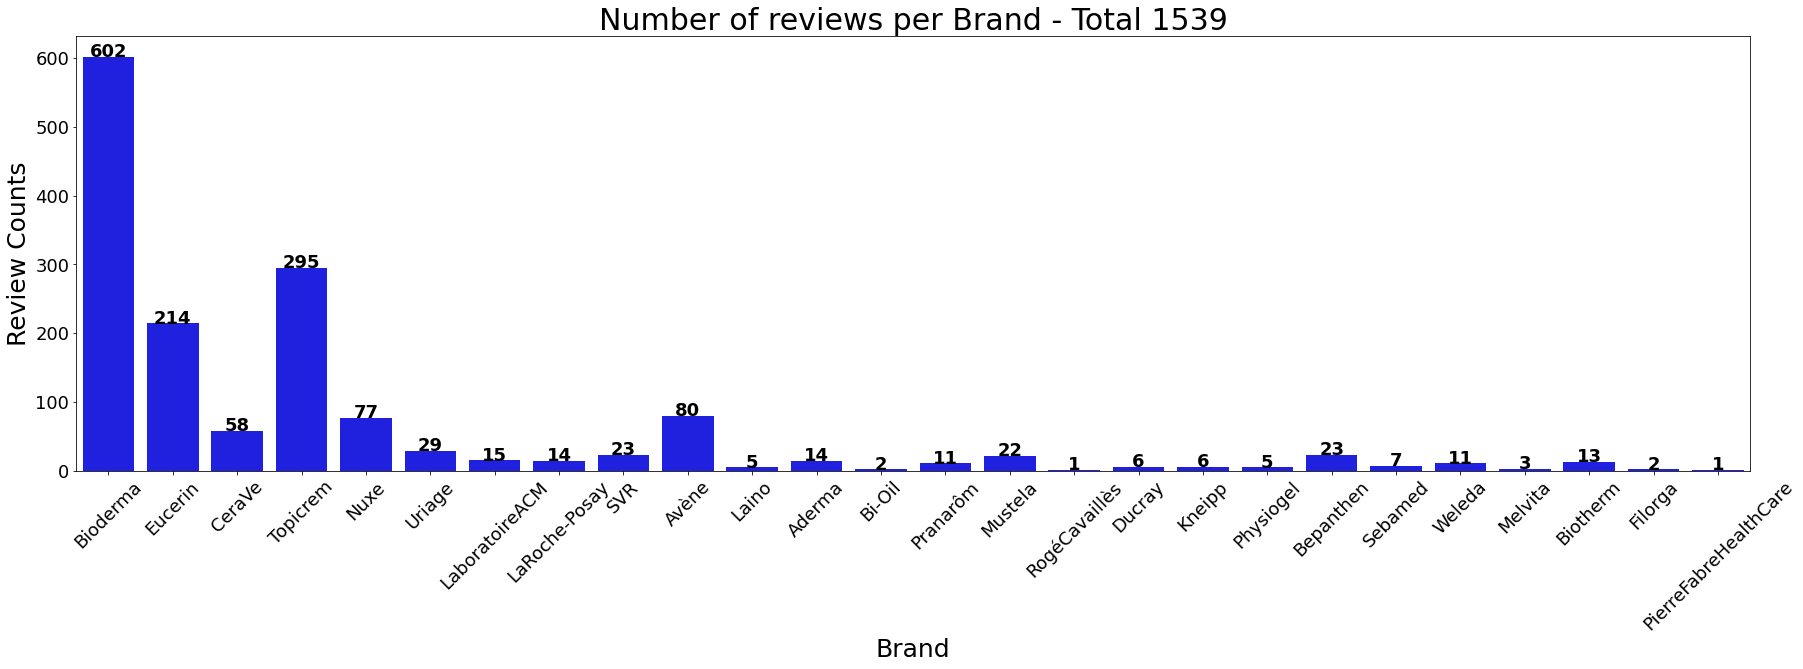

In [11]:
# initialize a figure object
plt.figure(
    # determine an initial size by passing length and width as parameters
    figsize = (30,8)
)
# initialize a plot on the axis by calling seaborn's 'countplot' function
ax = sns.countplot(
    # use the cocoon pharmacy dataframe as the data for the plot
    data = cocoon_pharmacy_df,
    # use the 'brand' column for the x axis
    x = 'brand',
    color = 'blue'
)
# iterate through each subcomponent (patch) drawn on the axis
for p in ax.patches:
    # store the value of the subcomponent in a variable
    x = p.get_x()
    # store the height it's drawn to within the axis
    height = p.get_height()
    # store the width it's drawn to within the axis
    width = p.get_width()
    # if it is located below the displayed axis on the figure we can skip it
    if pd.isnull(height):
        pass
    else:
        # add the subcomponent's value at its location (label the bars)
        ax.text(
            x + width/2,
            height,
            str(height),
            ha = 'center',
            weight = 'bold',
            fontsize = 18
        )
# rotate the labels on the x-axis and change their font size
plt.xticks(
    rotation = 45,
    fontsize = 18
)
# change the font size for labels on the y-axis
plt.yticks(
    fontsize = 18
)
# add a label to the x-axis
plt.xlabel(
    'Brand',
    fontsize = 25
)
# add a label to the y-axis
plt.ylabel(
    'Review Counts',
    fontsize = 25
)
# add a title to the figure
plt.title(
    'Number of reviews per Brand - Total {}'.format(
        # similar to using f' before a string, using .format replaces the {} in
        # the string above with the contents of the object below
        cocoon_pharmacy_df.shape[0]
    ),
    size = 30
)
# display the figure containing the plot
plt.show()

### How many reviews belong to each product category?

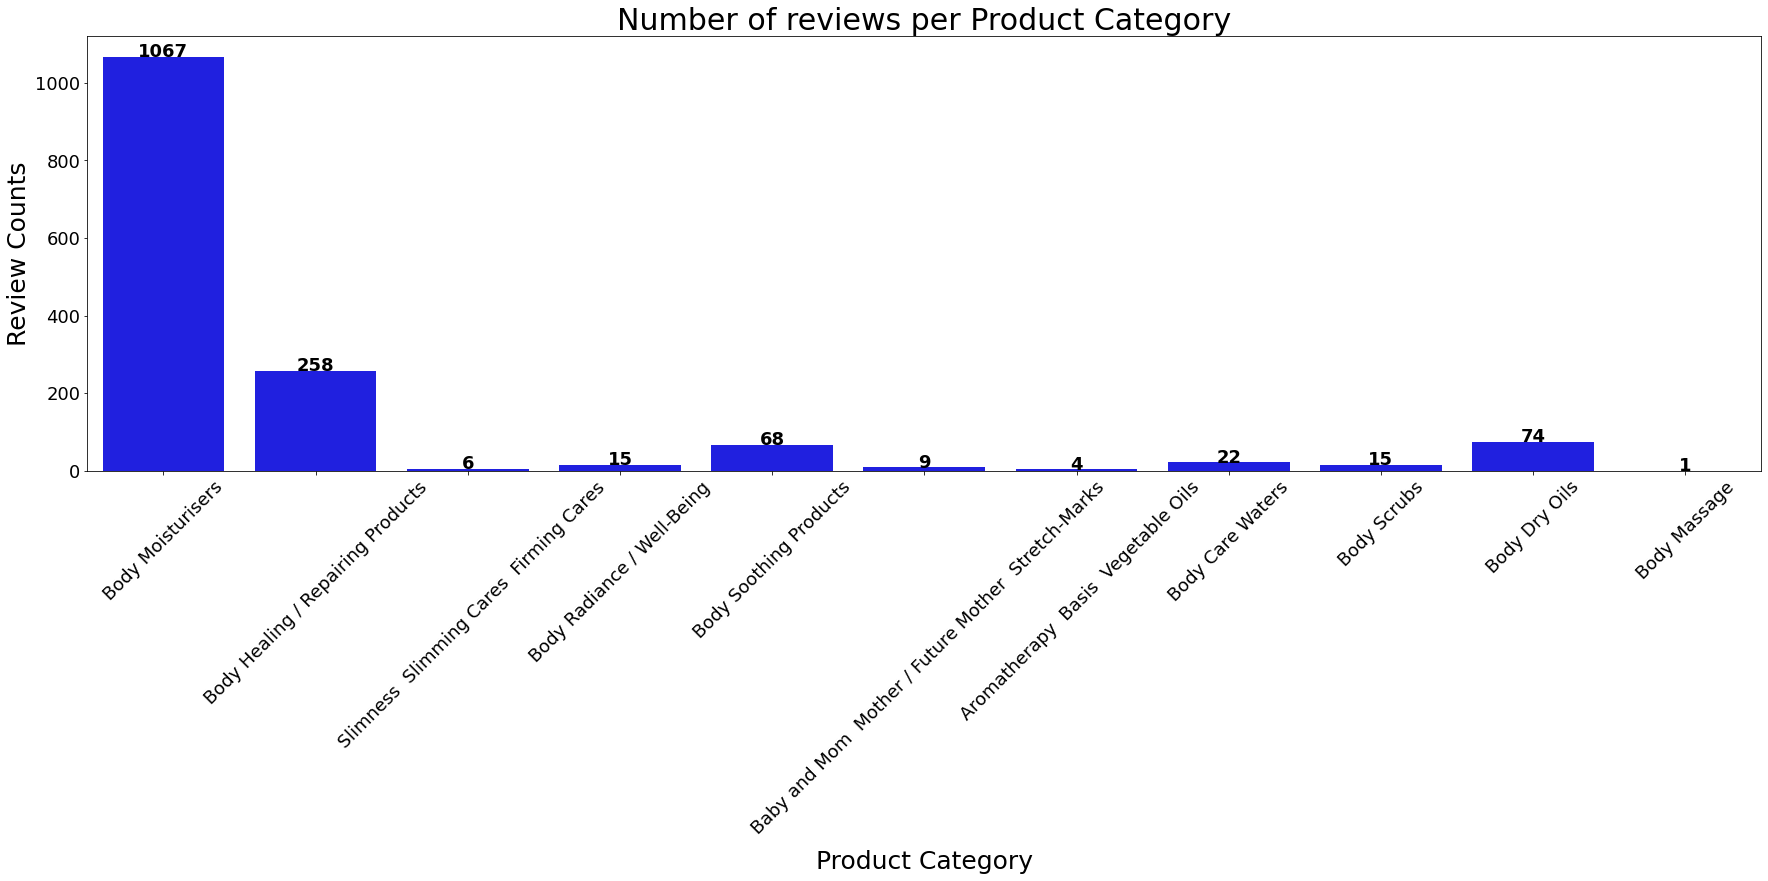

In [12]:
# initialize a figure object
plt.figure(
    # determine an initial size by passing length and width as parameters
    figsize = (30,8)
)
# initialize a plot on the axis by calling seaborn's (sns) 'countplot' function
ax = sns.countplot(
    # use the cocoon pharmacy dataframe as the data for the plot
    data = cocoon_pharmacy_df,
    # use the 'product_cat' for the x-axis values
    x = 'product_cat',
    color = 'blue'
)
# iterate through each subcomponent (patch) drawn on the axis
for p in ax.patches: 
    # store the value of the subcomponent in a variable
    x = p.get_x()
    # store the height it's drawn to within the axis
    height = p.get_height()
    # store the width it's drawn to within the axis
    width = p.get_width()
    # if it is located below the displayed axis on the figure we can skip it
    if pd.isnull(height):
        pass
    else:   
        # add the subcomponent's value at its location (label the bars)
        ax.text(
            x + width/2,
            height,
            str(height),
            ha = 'center',
            weight = 'bold',
            fontsize = 18
        )
# rotate the labels on the x-axis and change their font size
plt.xticks(
    rotation = 45,
    fontsize = 18
)
# change the font size for labels on the y-axis
plt.yticks(
    fontsize = 18
)
# add a label to the x-axis
plt.xlabel(
    'Product Category', 
    fontsize = 25
)
# add label to the y-axis
plt.ylabel(
    'Review Counts',
    fontsize = 25
)
# add a title to the figure
plt.title(
    'Number of reviews per Product Category',
    fontsize = 30
)
# display the figure containing the plot
plt.show()

### How many reviews are there for each product category per brand?

TIP: Create a new object when performing transformations to maintain an 'original' with the raw data

In [13]:
# create a new dataframe object to view the forms grouped by category and brand
grouped_count_df = cocoon_pharmacy_df.groupby(
    # pass a list of columns we want to groupby
    [
        'product_cat',
        'brand'
    ]
# slice for the 'form' column and get a count
)['form'].count().reset_index().rename(
    # rename the column to an appropriate label after transforming
    {
        'form':'Review Count'
    },
    # axis = 0 means apply to rows, axis = 1 means apply to columns
    axis = 1
# replace the sliced index (which may be out of order) with a new sequential one
).reset_index()

In [14]:
# initialize a figure object using plotly express' bar plot function
fig = px.bar(
    # use the dataframe we just created above as the data source for the plot
    grouped_count_df,
    # use product category for the x-axis
    x = 'product_cat',
    # use the new review count column for the y-axis
    y = 'Review Count', 
    # color the subplots differently based on the 'brand' column value
    color = 'brand',
    # use a discrete color sequence made for qualitative values 
    color_discrete_sequence = px.colors.qualitative.Dark24
)
# add a label to the x-axis and rotate the ticks
fig.update_xaxes(
    tickangle = 325,
    title = 'Brand'
)
# add a label to the y-axis
fig.update_yaxes(
    title = 'Review Counts'
)
# add a title to the figure
fig.update_layout(
    # 'title' takes a dictionary argument so multiple properties can be passed
    title = dict(
        # create a text - title, key - value pair to define that property
        text = '<b>Number of reviews per Product Category and Brand</b>',
        # font also takes a dictionary to discern different properties
        font = dict(
            # in this case we only define a size property
            size = 24
        )
    ),
    # dictionaries can be created using the dict() function or {k:v} syntax
    xaxis = {
        # this property tells the plot to sort the xaxis in descending order
        'categoryorder': 'total descending'
    }
)
# display the figure containing the plot
fig.show()

### What is the price variation between brands for each product category?

TIP: Grouping object assignments and function calls into cells should be done with readability and debugging in mind

In [15]:
# create a new dataframe object to view the unique values in a group of columns
brand_product_prices = cocoon_pharmacy_df[
    # slice the dataframe for the following list of columns
    [
        'brand',
        'product_cat',
        'form',
        'volume',
        'price'
    ]
# drop rows with duplicated entries, keeping the last by default 
].drop_duplicates() # closed parenthesis () tells functions to use default args
# overwrite the contents of the volume column by 'assigning' a modified version
brand_product_prices['volume'] = brand_product_prices['volume'].replace(
    # replace values that say 'not available' with a 'null' object
    {
        'not available': None
    }
)
# create a new column called price per ml by using existing columns
brand_product_prices['price_per_ml'] = brand_product_prices['price'].div(
    # use a vectorized operation to divide the prices by the volumes
    brand_product_prices['volume'].astype(
        # astype function converts the text values in this column to decimals
        'float'
    )
)

In [16]:
# initialize a figure object using plotly express' box plot function
fig = px.box(
    # use the dataframe we just created above as the data source
    brand_product_prices,
    # use brand for the x-axis
    x = 'brand',
    # use the new price per milliliter column for the y-axis
    y = 'price_per_ml',
    # color the subplots based on the 'product category' column value
    color = 'product_cat',
    # show all points instead of hiding outliers past a certain threshold
    points = 'all'
)
# add a label to the x-axis and rotate the ticks
fig.update_xaxes(
    tickangle = 325,
    title = 'Brand'
)
# add a label to the y-axis
fig.update_yaxes(
    title = 'Price per ml'
)
# add a title to the figure
fig.update_layout(
    title = 'PRICE VARIATION PER BRAND AND PRODUCT CATEGORY'
)
# add text to the title in the figure
fig.update_layout(
    # 'title' parameter takes a dictionary so multiple arguments can be passed
    title = dict(
        # add subtitle
        text = '<b>Price variation per product and brand</b>',
        # 'font' also takes a dictionary but we are just changing one property
        font = dict(
            size = 24
        )
    )
)
# display the figure containing the plot
fig.show()


### Where are customers located?

In [17]:
# clean up text in the customer locations column by 'redefining' the object
cocoon_pharmacy_df['customer_loc'] = cocoon_pharmacy_df['customer_loc']\
.str.strip(  # remove whitespace from the ends of each string (text object)
).str.lower( # turn all characters into lowercase
).replace(
    # replace vague and unused labels
    {
        'the kingdom':'saudi arabia',
        'good':None,
        'not available':None,
        'ksa':'saudi arabia',
        'the kingdom':'saudi arabia',
        'london o':'london, ontario',
        'cheshire':'cheshire, uk',
        '-':None,
        'sale, cheshire':'sale, cheshire, uk',
        'tilbury, essex':'tilbury, essex, uk',
        'middle east':'ksa middle east',
        'kingston':'kingston, uk',
        'awali':'awali, bahrain',
        'riyadh, s. a.':'riyadh, saudi arabia',
        'north':None,
        'south east':None,
        'memo':None
    }
)
# initialize geolocator object to get coordinates from location names
geolocator = geopy_Nominatim(
    user_agent = "s"
)
# display example output of coordinates based on a given location name
geolocator.geocode("Abu Dhabi")

Location(أبو ظبي, الإمارات العربية المتحدة, (24.4538352, 54.3774014, 0.0))

**NOTE: The two (2) cells below do not need to be run if 'cocoon_pharmacy_location_added.csv' is present in the '/data/' folder**

In [19]:
# create columns with coordinates for the customer locations
new_cocoon_df = cocoon_pharmacy_df.assign(
    Customer_Location_Latitude_Longitude = cocoon_pharmacy_df['customer_loc'].apply(
        # lamdda denotes an anonymous function where the 'caller' is the 'input'
        # in this case if the value is not null we want to get the 'geocode'
        lambda x: geolocator.geocode(x) if pd.notnull(
            geolocator.geocode(x)
        ) else None # otherwise we leave null values alone
    ),
    # use the column created in the lines above to create the two columns below
    Latitude = cocoon_pharmacy_df['Customer_Location_Latitude_Longitude'].apply(
        lambda x: x.latitude if pd.notnull(x) else None
    ),
    Longitude = cocoon_pharmacy_df['Customer_Location_Latitude_Longitude'].apply(
        lambda x: x.longitude if pd.notnull(x) else None
    )
)
# get set of columns in the dataframe excluding the ones pertaining to coordinates
# a set is a container object which only keeps unique values but does not 
# maintain its contents in the order they were placed 
columns_without_customer_location = set(
    new_cocoon_df.columns
).difference(
    # we can use the difference function of sets to exclude a subset of values
    [
        'Customer_Location_Latitude_Longitude',
        'Latitude',
        'Longitude'
    ]
)
# use slicing to remove  duplicates in the non-coordinate columns
new_cocoon_df = new_cocoon_df.loc[
    # slice the dataframe for columns without location and then drop the duplicates
    new_cocoon_df[columns_without_customer_location].drop_duplicates(
        # keep the first instance of a duplicate
        keep  = 'first'
    # use the index of this 'de-duped' dataframe to slice for the 'first' instance of each value
    ).index,
    # ':' by itself slices for all columns
    :
]

TIP: Save python objects back into files to avoid recomputing time-consuming transformations 

In [ ]:
# store the modified dataframe as a .csv file in the 'data' folder
new_cocoon_df.to_csv(
    '../data/cocoon_pharmacy_location_added.csv'
)

**NOTE: The cell below can be run without the preceeding two (2) if 'cocoon_pharmacy_location_added.csv' is present in the '/data/' folder**

In [20]:
# overwrite the 'cocoon_pharmacy_df' object with a dataframe of our 'new' file
cocoon_pharmacy_df = pd.read_csv(
    '../data/cocoon_pharmacy_location_added.csv',
    # this dataframe was stored as .csv, with the index in the first position
    index_col = 0
)

In [21]:
# initialize a figure by using plotly express' geographic scatter plot function
fig = px.scatter_geo(
    # use the 'new' dataframe which has customer location coordinates
    cocoon_pharmacy_df,
    # use the column named 'Latitude' for latitude coordinates
    lat = 'Latitude',
    # use the column named 'Longitude' for Longitude coordinates
    lon = 'Longitude',
    # use customer location text to label the box that appears when hovering
    hover_name = 'customer_loc'
)
# set properties for the map the plot will be drawn on
fig.update_geos(
    # set a resolution for the rendered image
    resolution = 50,
    # show land on the map
    showland = True,
    # make the land light green
    landcolor = "LightGreen",
    # show oseans on the map
    showocean = True, 
    # make the oceans light blue
    oceancolor = "LightBlue"
)
# set the margins of the dynamic figure and add a gray background
fig.update_layout(
    margin = dict(
        l = 5,
        r = 5,
        t = 25,
        b = 5
    ),
    paper_bgcolor = "lightGrey"
)
# set new subplot properties
fig.update_traces(
    marker = dict(
        size = 9,
        color = 'yellow',
        opacity = 0.6
    )
)
# add a title to the figure
fig.update_layout(
    title = 'Customer Locations, Cocoon Pharmacy'
)
# display the figure containing the plot
fig.show()

### What are the most common terms used in reviews of each product category?

In [22]:
# iterate through list of components to download from the NLTK library
for component in [
    'punkt',
    'stopwords',
    'averaged_perceptron_tagger',
    'wordnet',
    'omw-1.4'
]:
    # use nltk's download function to pull the components
    nltk.download(
        component
    )

[nltk_data] Downloading package punkt to /home/dshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dshah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/dshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dshah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NOTE: '\\' is an escape character, when used at the end of a line it extends it to include the contents of the one below (escapes newline)

In [23]:
# clean up the column containing the text body of the customer reviews
cocoon_pharmacy_df['body_review'] = cocoon_pharmacy_df['body_review']\
.str.lower( # convert all the text in the reviews to lowercase 
).apply( 
    # apply an anonymous function to remove all special characters
    lambda x:  re.sub(
        r'[^\w\s]',
        '',
        x
    )
)

In [24]:
# create a function to generate a wordcloud for a given dataframe
def make_wordcloud(
    # takes one positional argument of Pandas DataFrame type named 'df'
    df: pd.DataFrame
# returns a wordcloud object
) -> WordCloud:
    # create a string object of all the words in all the reviews in the frame
    all_words = ' '.join( # each review body will be separated by empty space
        # assumes each dataframe has a column named 'body_review'
        df['body_review']
    )
    # create an object of the tokens in all reviews in a dataframe, where a 
    # token is a grouping of alphanumeric characters such as a word or punctuation
    tokenized_words = nltk_word_tokenize(
        # this separates a continuous string of text into a list of tokens
        all_words
    )
    # create set of unique english 'stopwords' (i.e. 'and', 'to', 'of')
    # the set() function and curly brackets without 'key:value' pairs both create a set  
    english_stops = {
        # the asterisk '*' at the beginning unpacks the list's contents so all
        # the items within are passed instead of just the container object
        *nltk_stopwords.words(
            # passing a language generates the list of all stopwords nltk has for it 
            'english'
        )
    }
    # create string of all tokenized words that fit some conditions
    all_tokens = ' '.join( # each token will be separated by empty space
        # by using an expression we can 'generate' the contents of a list
        [
            # iterate through the tokens from the tokenized_words object above
            # by placing them in the temporary variable 'token' if they satisfy conditions
            token for token in tokenized_words if ( 
                # first condition checks tokens are longer than 2 characters
                len(token) > 2 
            ) and (  # and statement means both conditions must be true
                # second condition checks tokens are not a stopword
                token not in english_stops # not found in stopword list
            ) and (  # chaining and statements allows us to enforce multiple
                # third condition checks the token is not an empty string
                pd.notna(token)
            ) and (  # placing conditions in parenthesis is not necessary but improves readability
                # fourth condition checks the token consists only of letters
                token.isalpha()
            )
        ]
    )
    # initialize the WordNetLemmatizer from the 'Natural Language Tool Kit'
    lemmatizer = nltk_WordNetLemmatizer() # closed parenthesis since it's a call not an object
    # use the 'Part of Speech' tagger to add what each word token is
    parts_of_speech = nltk_pos_tag( # adds label to tag as 'noun', 'verb', etc.
        # create new list of tokens from those that passed the conditions above
        # i.e. [('word', 'wordtype'), (.., ..)] with a pair of values for each word
        nltk_word_tokenize(
            all_tokens
        )
    )
    # initialize the final object that will contain the wordcloud text  
    wordcloud_tokens = ''
    # iterate through a sequence of integers of size equal to the number of tokens
    for i in range( # generates a sequence from 0 to the number passed by default
        # len function can return the number of objects in a container object
        len(
            # in this case parts_of_speech is a list of labeled tokens
            parts_of_speech
        )
    ):  
        ''' NOTE: triple quotes can be used to create a multi-line comment, like
        - Objects defined in an indented block are temporary by default since
        they are only present during its execution

        - [] notation at the end of an object lets us access its contents if its 
        a container, although the syntax varies by type
        ''' 
        if "V" in parts_of_speech[i][1][0]:
            ''' NOTE: The line above is best read in reverse order, it states that if
            the list in position 0 (first) of the object at position 1 (second) 
            of the object at position i (which is the value we're iterating) 
            in the parts_of_speech list contains the string 'v', then proceed to 
            the indented block below where we create a temporary object with a 
            text string ('v'). We slice the parts_of_speech list this way because 
            it is in the format [('word', 'wordtype'), (.., ..)]
            '''
            pos = 'v'
        else:
            # otherwise we create the same object but with a value of 'n'
            pos = 'n'
        # use the lemmatizer object to group words with inflections together
        lem = lemmatizer.lemmatize(
            # takes the word itself, which is the first object in each pair in the list
            parts_of_speech[i][0],
            # use the 'pos' object from if/else block above to tell the lemmatizer 
            # what it needs to group each word with (i.e. nouns or verbs), converting 
            # them when possible if they're an adjective, conjuction, etc. 
            pos
        )
        # add the lemmatized token to the output string with a space to separate it
        wordcloud_tokens += (lem) + ' ' # += tells python to add to the object and not overwrite it
    # generate wordcloud and store it in an object while passing some arguments
    wordcloud_from_reviews = WordCloud(
        # a list of stopwords to remove from the output
        stopwords = wordcloud_STOPWORDS,
        # what percentage of the words should be displayed horizontally
        prefer_horizontal = 0.9,
        # the maximum number of words to display
        max_words = 100
    ).generate( # call the generate function from the object being initialized
        # pass the tokens that have been cleaned, vetted, and lemmatized
        wordcloud_tokens
    )
    # return the wordcloud object when the function is called
    return wordcloud_from_reviews

Body Moisturisers
Body Healing / Repairing Products
Body Dry Oils
Body Soothing Products


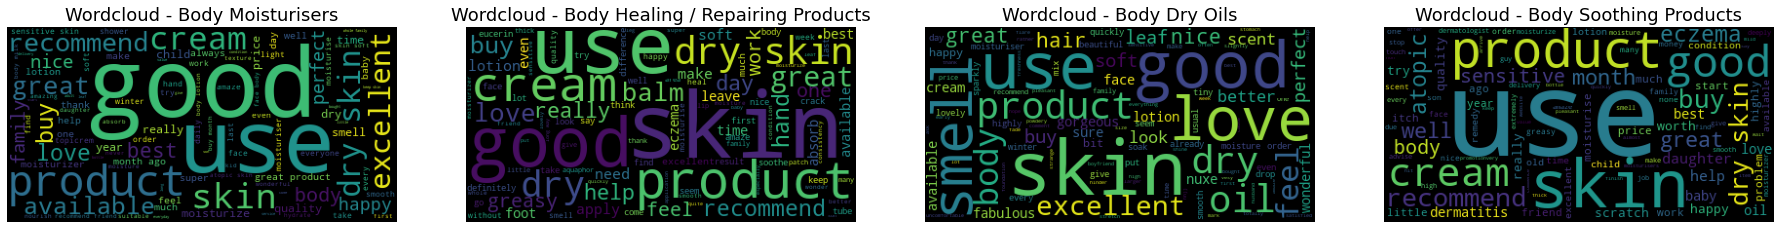

In [25]:
# initialize a figure with one row and four columns to fit multiple subplots
fig,ax = plt.subplots(
    nrows = 1,
    ncols = 4,
    figsize = (25,10)
)
# initialize an object to track the columns in the figure housing the wordclouds 
column_num = 0
# iterate through a list of the top five product categories in descending order
# and define a temporary object named 'category' to reference its contents during iteration
for category in cocoon_pharmacy_df['product_cat'].value_counts( # counts the occurrence of each value in 'product_cat'
).sort_values(
    # sorts the values by descending order of their frequency
    ascending = False
# a colon inside brackets [:VALUE] lets us slice for all values up to (or from) 
# a position, .index grabs the labels for the rows in the dataframe (in this 
# case the categories themselves), so the line below gets the first five labels
# from the sorted list of category frequencies we created in the lines above
)[:4].index:
    # display the value of the 'category' object we're iterating over
    print(
        category
    )
    # add a wordcloud to the figure at the 'column_num' column in the axis (i.e. 0 = first)  
    ax[column_num].imshow(
        # call the function we defined earlier to create wordclouds from a dataframe
        make_wordcloud(
            # pass a slice of the dataframe with all rows with the category we're iterating through
            cocoon_pharmacy_df[cocoon_pharmacy_df['product_cat'] == category]
        )
    )
    # turn off the ticks to display only the images drawn on the figure
    ax[column_num].axis("off")
    # add a title to each image on the figure
    ax[column_num].set_title(
        # f' syntax lets us replace the contents of a {} with the value of an object
        f'Wordcloud - {category}', # e.g 'Wordcloud - Body Dry Oils' if category = 'Body Dry Oils' 
        fontsize = 18
    )
    # increment the object so the following iteration adds a figure to the next column over
    column_num += 1
# remove whitespace around the edges of the image in the figure
fig.tight_layout()
# display the figure containing the plots
plt.show()

[Top](#Exploratory-Data-Analysis-with-Python)

---

## Step 5: Outline a plan of action for arriving at the final product

NOTE:
- Keep the [Value-Information-Analytics](https://catalent.sharepoint.com/sites/EnterpriseDataScience/SitePages/A-Methodical-Approach-to-a-Data-Centric-Problem.aspx) model in mind when determining the viability of an approach
- Not all questions have to be answered at this point, but an understanding of the data and how it can resolve the business problem should be clear before proceeding

---
---